##### 선형 회귀

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

## 보스턴 집값 예측 데이터 
각 데이터베이스의 레코드는 보스턴 교외 또는 마을을 설명한다.

이 데이터는 1970년 보스턴 표준 도시 통계 지역(SMSA)에서 수집되었다. (UCI ML Repositor에서 발췌):

- CRIM: 마을별 1인당 범죄율
- ZN: 25,000 평방피트를 초과하는 주거용 토지 비율
- INDUS: 비소매 업종이 차지하는 마을별 비율
- CHAS: 찰스강 더미 변수 (강과 인접한 지역이면 1, 아니면 0)
- NOX: 질소 산화물 농도 (1,000만분의 1 단위)
- RM: 주택당 평균 방 개수
- AGE: 1940년 이전에 지어진 자가 소유 주택 비율
- DIS: 보스턴 고용 센터 5곳까지의 가중 거리
- RAD: 방사형 고속도로 접근성 지수
- TAX: \$10,000당 전체 재산세율
- PTRATIO: 마을별 학생-교사 비율
- B: $1000(Bk−0.63)^2$ (여기서 Bk는 마을별 흑인 비율)
- LSTAT: 저소득층 인구 비율
- MEDV: (타겟) Median House Value 자가 소유 주택의 중앙값 (단위: \$1000s)

In [2]:
boston_df = pd.read_csv('./data/boston_housing_train.csv')
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
boston_df.info(), boston_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


(None,
              CRIM          ZN       INDUS        CHAS         NOX          RM  \
 count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
 mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
 std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
 min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
 25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
 50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
 75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
 max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   
 
               AGE         DIS         RAD         TAX     PTRATIO           B  \
 count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
 mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
 std   

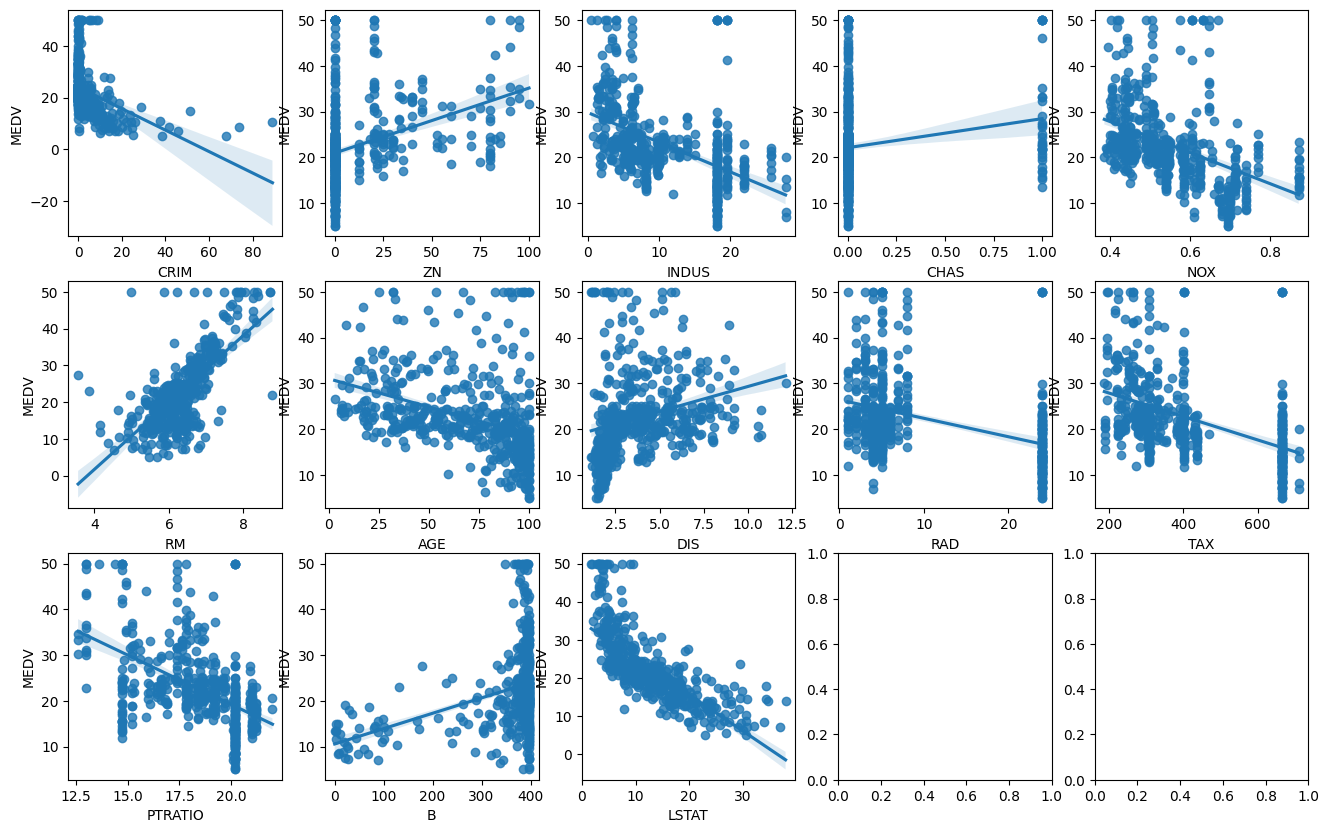

In [4]:
fig, ax = plt.subplots(figsize=(16, 10), ncols=5, nrows=3)
# 디삿 개 칼럼, 세 개의 행 -> 15개의 subplot 생김

columnns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]

for i, col_name in enumerate(columnns):
    row = i // 5
    col = i % 5
    # 0<=row<=2, 0<=col<=4

    ax_temp = ax[row][col]
    
    # sns.scatterplot(data=boston_df, x=col_name, y='MEDV', ax=ax_temp)
    # 산점도

    sns.regplot(data=boston_df, x=col_name, y='MEDV', ax=ax_temp)
    # 산점도 + 선형 회귀 함수까지 나타냄
    # 회귀 추정치의 신뢰구간 크기도 함께 자동으로 나타내짐. `ci=None`으로 두면 사라짐

회귀식
y = w1x1 + w2x2 + ... + w13x13 + x0

칼럼이 13개이므로 가중치 13개, 절편 하나로 구성된 선형 회귀일 것.

In [5]:
# 학습 - 테스트 데이터 분리
X = boston_df.iloc[:, :13]
y = boston_df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
# 학습 및 평가
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#학습
lr.fit(X_train, y_train)

#평가
lr.score(X_test, y_test)
# 평가 점수는 기본 결정계수(R^2)로 계산해 출력.
# 68점... -> 과소적합 가능성 o

0.684426728352709

In [7]:
# 다른 평가 지표 사용
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score


y_pred = lr.predict(X_test)

def evaluate_regression(y_true, y_pred):
    #mse
    mse = mean_squared_error(y_true, y_pred)
    #rmse
    rmse = root_mean_squared_error(y_true, y_pred)
    #mae
    mae = mean_absolute_error(y_true, y_pred)
    #r2
    r2 = r2_score(y_true, y_pred)

    print(f'MSE: {mse}, RMSE: {rmse}, MAE: {mae}, R2:{r2}')

# evaluate_regression(y_test, y_pred)
# MSE: {22.09869482709827} RMSE: {4.700924890603791}
# MAE: {3.0609395954370795} R2: {0.684426728352709}

# MSE, RMSE, MAE는 분자에 잔차가 있으므로 크기가 작을 수록 좋음. 

In [8]:
print(columnns)
print(lr.coef_, lr.intercept_)
# 회귀계수와 절편 속성

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
[-1.28322638e-01  2.95517751e-02  4.88590934e-02  2.77350326e+00
 -1.62388292e+01  4.36875476e+00 -9.24808158e-03 -1.40086668e+00
  2.57761243e-01 -9.95694820e-03 -9.23122944e-01  1.31854199e-02
 -5.17639519e-01] 29.83642016383845


##### 다항 회귀
- 회귀식이 선형이 아닌 2차, 3차 방정식으로 표현되는 회귀 기법

In [9]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
# X(input)값의 특성을 늘리는 작업
# 13개의 특성을 최대 2차수까지 조합 -> 모든 가능성이 104개

# 학습
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
# 평가
print(lr_poly.score(X_test_poly, y_test), lr_poly.score(X_train_poly, y_train))
# (0.7758378393362159, 0.9448313975211595)

y_pred = lr_poly.predict(X_test_poly)
evaluate_regression(y_test, y_pred)
# MSE: 15.697435826658243, RMSE: 3.961998968533213,
# MAE: 2.5831967744134205, R2:0.7758378393362159
# 모든 지표 좋아짐

0.7758378393362159 0.9448313975211595
MSE: 15.697435826658243, RMSE: 3.961998968533213, MAE: 2.5831967744134205, R2:0.7758378393362159


##### 과대적합/과소적합 
https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

**California Housing Dataset**는 머신러닝과 데이터 분석에서 자주 사용되는 데이터셋으로, 1990년 미국 캘리포니아 주의 인구 조사를 기반으로 수집된 주택 관련 데이터이다. 이 데이터셋은 캘리포니아 내의 블록 그룹(block group)을 나타내며, 각 레코드는 하나의 블록 그룹을 의미한다. 블록 그룹은 미국 인구 조사국에서 표본 데이터를 제공하는 가장 작은 지리적 단위이다.
- 데이터셋은 **20,640개의 레코드**로 구성되어 있다.
- **회귀 모델링**: 주택 가격 예측.
- **탐색적 데이터 분석(EDA)**: 주택 특징 간의 관계 분석.
- **특징 엔지니어링 및 선택**: 영향력 있는 특징 도출.


**특징**

1. **MedInc**: 블록 그룹 내의 중간 소득 (단위: 만 달러).
2. **HouseAge**: 블록 그룹 내의 중간 주택 연수.
3. **AveRooms**: 블록 그룹 내 가구당 평균 방 수.
4. **AveBedrms**: 블록 그룹 내 가구당 평균 침실 수.
5. **Population**: 블록 그룹 내 인구 수.
6. **AveOccup**: 블록 그룹 내 가구당 평균 거주자 수.
7. **Latitude**: 블록 그룹의 위도.
8. **Longitude**: 블록 그룹의 경도.

**목표 변수**

- **MedHouseVal**: 블록 그룹 내 가구의 중간 주택 가치 (단위: 만 달러).


In [ ]:
#(실습-완료) # 캘리포니아 집값 로드
from sklearn.datasets import fetch_california_housing

cali_data = fetch_california_housing()

cali_data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [16]:
# DataFrame 생성 -> 구조, 기초 통계
cali_df = pd.DataFrame(cali_data.data, columns=cali_data.feature_names)
cali_df['MedHouseVal']=cali_data.target
print(cali_df.info(), cali_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None              MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.

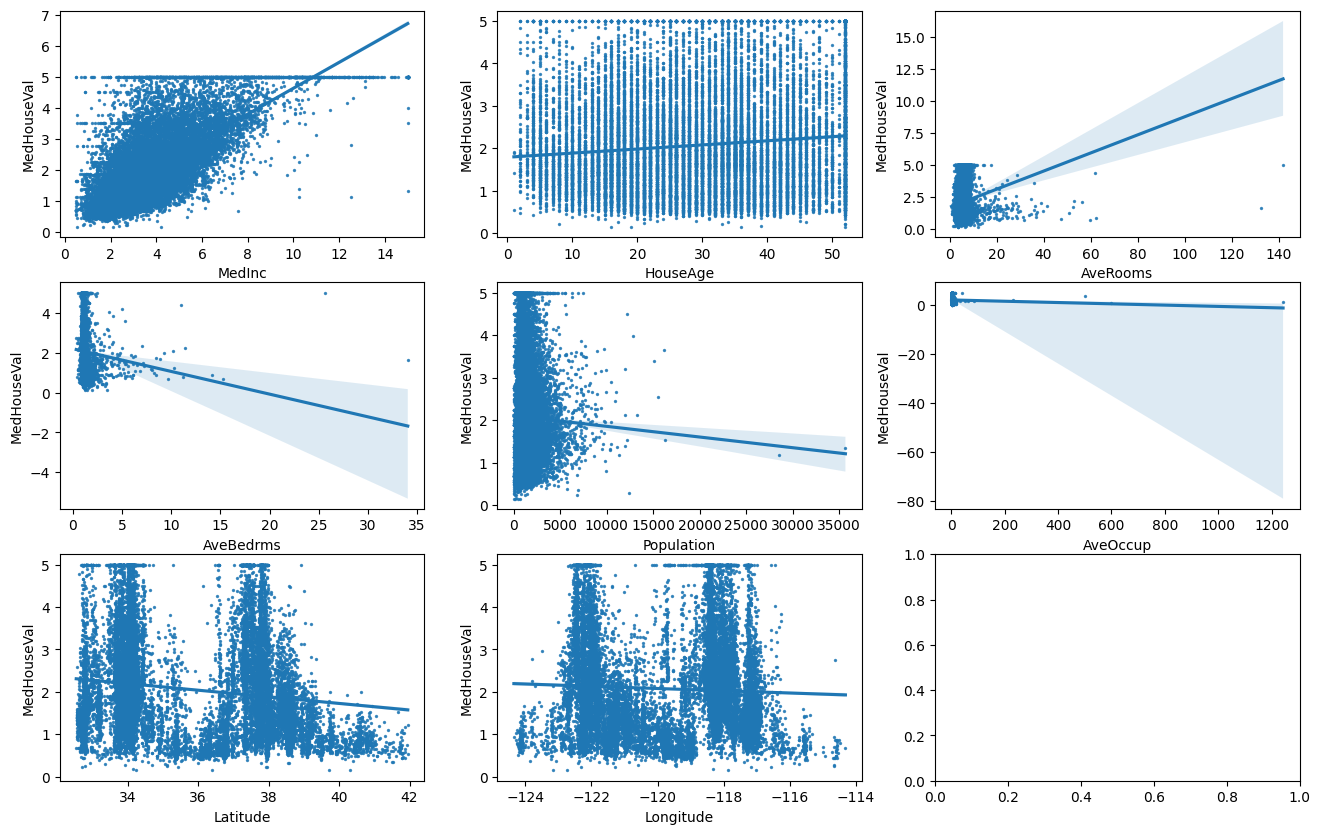

In [ ]:
# 시각화, 특성 확인
fig, ax = plt.subplots(figsize=(16, 10), ncols=3, nrows=3)
# 9개 칼럼

columnns = cali_data.feature_names

for i, col_name in enumerate(columnns):
    row = i // 3
    col = i % 3
    # 0<=row<=2, 0<=col<=4
    
    ax_temp = ax[row][col]
    
    # sns.scatterplot(data=boston_df, x=col_name, y='MEDV', ax=ax_temp)
    # 산점도

    sns.regplot(data=cali_df, x=col_name, y='MedHouseVal', ax=ax_temp, scatter_kws={'s': 2})
    

In [ ]:
# input, label 데이터 지정
X = cali_df.drop('MedHouseVal', axis=1)
y = cali_df['MedHouseVal']

# 훈련-검사 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

(       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 8158   4.2143      37.0  5.288235   0.973529       860.0  2.529412     33.81   
 18368  5.3468      42.0  6.364322   1.087940       957.0  2.404523     37.16   
 19197  3.9191      36.0  6.110063   1.059748       711.0  2.235849     38.45   
 3746   6.3703      32.0  6.000000   0.990196      1159.0  2.272549     34.16   
 13073  2.3684      17.0  4.795858   1.035503       706.0  2.088757     38.57   
 
        Longitude  
 8158     -118.12  
 18368    -121.98  
 19197    -122.69  
 3746     -118.41  
 13073    -121.33  ,
 20046    0.47700
 3024     0.45800
 15663    5.00001
 20484    2.18600
 9814     2.78000
 Name: MedHouseVal, dtype: float64)

In [26]:
# 다중회귀(훈련, 평가, 다른 평가 지표로 평가)
lr = LinearRegression()

#학습
lr.fit(X_train, y_train)

#평가
print(lr.score(X_train, y_train), lr.score(X_test, y_test))

# 다른 평가 지표로 평가
evaluate_regression(y_test, lr.predict(X_test))

0.609873031052925 0.5910509795491354
MSE: 0.5411287478470685, RMSE: 0.7356145375446766, MAE: 0.5296964012919458, R2:0.5910509795491354


In [36]:
# 다항회귀(훈련, 평가, 다른 평가 지표로 평가)
poly = PolynomialFeatures(include_bias=False, degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lr.fit(X_train_poly, y_train)
print(lr.score(X_train_poly, y_train), lr.score(X_test_poly, y_test))
evaluate_regression(y_test, lr.predict(X_test_poly))

0.6829089327528398 0.6563005879298475
MSE: 0.45478928469921964, RMSE: 0.6743806675010929, MAE: 0.4646020777049507, R2:0.6563005879298475
